In [1]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.0 MB/s eta 0:00:00


# K- 최근접 이웃 알고리즘

*   분류, 회귀 모델 모두 제공
*   훈련데이터셋에서 가장 가까운 데이터포인트 찾기 -> 유유상종, 끼리끼리



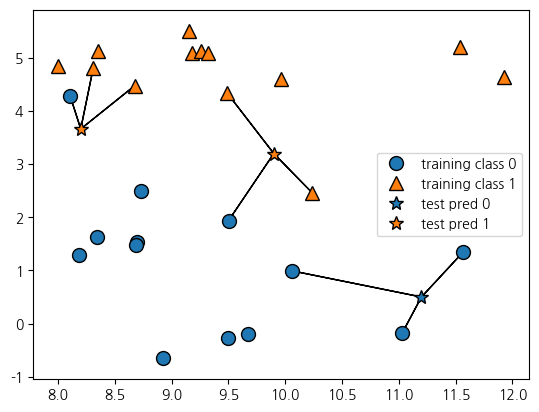

In [3]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.figure(dpi = 100)
mglearn.plots.plot_knn_classification(n_neighbors=3) # n_neighbors=3은 근접한 이웃수 설정 1, 2, 3,... 가능

## forge 데이터셋을 활용한 이진분류 문제 정의

### 데이터 준비하기

In [4]:
X, y = mglearn.datasets.make_forge() # X : 데이터 (독립변수, 특성, 문제집), y : 레이블 (타켓, 정답)

### 일반화 성능을 평가 할 수 있도록 데이터 분리 -> 훈련셋, 데이터셋

In [6]:
from sklearn.model_selection import train_test_split # 랜덤하게 잘라줌

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) # 75 : 25

In [7]:
X_train.shape

(19, 2)

In [8]:
X_test.shape

(7, 2)

### K-최근접 이웃 분류모델 설정

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) # defalt는 이웃수 5

### 모델 학습하기

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가하기

In [11]:
knn.score(X_test, y_test) # test set 예측 시킴

0.8571428571428571

In [13]:
knn.score(X_train, y_train) # train set 예측 정확도

0.9473684210526315

왜 차이가 날까 ? , 과연 최적의 이웃일까 ? sweet spot (최적점) 찾기 중요

## KNeighborsClassifier 이웃의 수에 따른 성능평가


1.   이웃의 수를 1 ~ 10까지 증가시켜 학습 진행
2.   score() 메서드를 이용하여 예측 정확도 저장
3.   차트를 활용하여 최적점 찾기



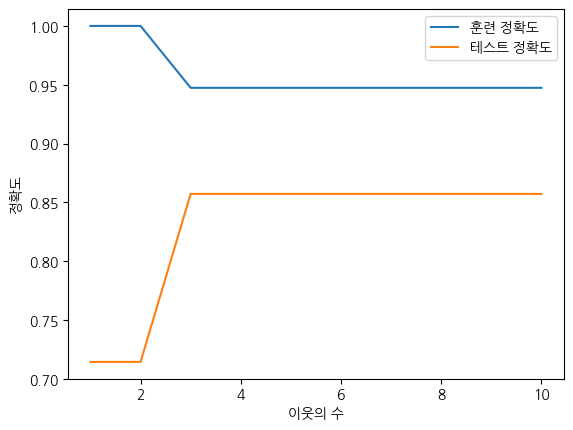

In [14]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# 이웃의 수 변수
n_neighbors_settings = range(1,11)

# 1~10까지 n_neighbors 의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings :
  # 모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  # 훈련데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  # 데스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

# 예측 정화도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label = '훈련 정확도')
plt.plot(n_neighbors_settings, test_scores, label = '테스트 정확도')

plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show()

이웃을 적게 사용하면 모델의 복잡도 ↑
이웃을 많이 사용하면 모델의 복잡도 ↓

## 유방암 데이터셋을 활용한 이웃의 수 (결정경계)에 따른 성능평가

### 데이터 준비하기

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [16]:
cancer.data.shape

(569, 30)

In [17]:
cancer.target.shape

(569,)

### 데이터 분리하기

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=7) # 75:25

In [19]:
X_train.shape

(426, 30)

In [20]:
X_test.shape

(143, 30)

### 1~20 이웃의 수를 증가시켜 성능 평가

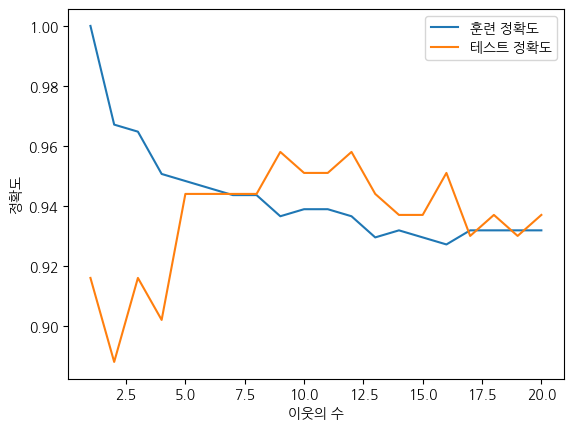

In [21]:
# 이웃의 수에 따른 정확도를 저장할 리스트 변수
train_scores = []
test_scores = []

# 이웃의 수 변수
n_neighbors_settings = range(1,21)

# 1~10까지 n_neighbors 의 수를 증가시켜 학습 후 정확도 저장
for n_neighbor in n_neighbors_settings :
  # 모델 생성 및 학습
  knn = KNeighborsClassifier(n_neighbors=n_neighbor)
  knn.fit(X_train, y_train)

  # 훈련데이터셋 정확도 저장
  train_scores.append(knn.score(X_train, y_train))

  # 데스트데이터셋 정확도 저장
  test_scores.append(knn.score(X_test, y_test))

# 예측 정화도 비교 그래프 그리기
plt.figure(dpi=100)

plt.plot(n_neighbors_settings, train_scores, label = '훈련 정확도')
plt.plot(n_neighbors_settings, test_scores, label = '테스트 정확도')

plt.xlabel('이웃의 수')
plt.ylabel('정확도')
plt.legend()
plt.show()

In [22]:
max(test_scores) # 최대 test_scores

0.958041958041958